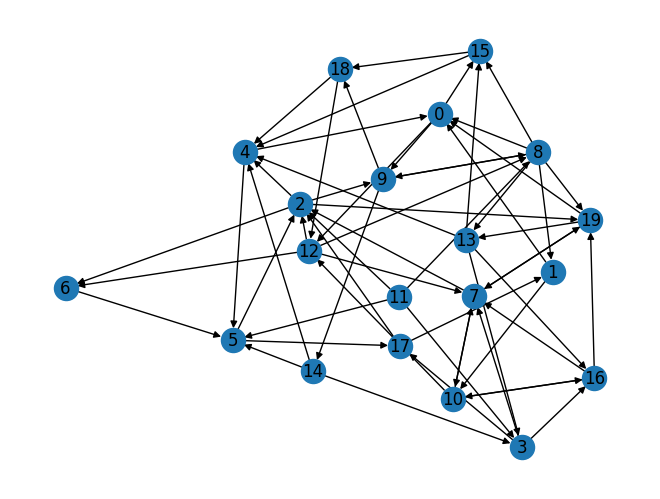

In [26]:
import networkx as nx
import random
from gensim.models import Word2Vec
import time

n = 20
p = 0.15

G = nx.erdos_renyi_graph(n, p, directed = True)

nx.draw(G, with_labels = True)


In [27]:
# idea:
# create graph and copy graph and make slight adjustments, compare both embeddings and caclulate distance
# have block using skipgram and alternative block using skipgram implementation from scratch (check geeksforgeeks for this, in separate python file)

# adjust signature for graph type

def random_walk(graph, start_node:int = 0, walk_length:int = 1) -> list[int]:

    sequence = [start_node]

    for _ in range(walk_length):
        neighbours = [neighbour for neighbour in graph.neighbors(start_node)]
        if neighbours == []:
          return sequence
        selected_neighbour = random.choice(neighbours)
        sequence.append(selected_neighbour)
        start_node = selected_neighbour

    return sequence

# example of random walks in graph
for _ in range(5):
    print(random_walk(G, random.randrange(n), 10))

[15, 18, 4, 5, 2, 4, 5, 2, 9, 8, 0]
[10, 12, 6, 5, 2, 19, 7, 10, 16, 19, 7]
[15, 18, 12, 2, 19, 13, 16, 7, 10, 7, 19]
[12, 7, 2, 19, 0, 15, 4, 0, 12, 8, 19]
[14, 3, 7, 2, 9, 14, 3, 7, 10, 7, 10]


In [28]:
# create walks for Word2Vec

amount_walks = 5
length_per_walk = 20

walks = []

for _ in range(amount_walks):
  walks.append(random_walk(G, random.randrange(n), length_per_walk))


# play around with Word2Vec hyperparameters

model = Word2Vec(walks, vector_size = amount_walks, window = 2, sg = 1, min_count = 1)
model.train(walks, total_examples = model.corpus_count, epochs = 30, report_delay = 1)


(482, 3150)

In [29]:
# show results of Deepwalk implementation

for node in range(n):
  print(f"Node {node:2d}: {model.wv.get_vector(node)}")

Node  0: [-0.20137039  0.03367975  0.24244222 -0.17798911 -0.05221477]
Node  1: [-0.13768065  0.13815391 -0.08831458 -0.1032851   0.18087833]
Node  2: [-0.07743783  0.07065953  0.16287678  0.14115177 -0.19545613]
Node  3: [ 0.00259574  0.03544417  0.09628189 -0.01496288  0.18948428]
Node  4: [-0.0882214   0.20900062 -0.07426595 -0.02802336 -0.1021422 ]
Node  5: [-0.22063656  0.20793842  0.24996953 -0.14739719 -0.08520747]
Node  6: [ 0.08085025  0.16885945  0.19781165 -0.02333273  0.11412627]
Node  7: [ 0.09240521  0.02687393 -0.04167311  0.09868386 -0.10359563]
Node  8: [ 0.05996673  0.22017914  0.01398416 -0.21579671  0.07813027]
Node  9: [-0.05442058 -0.10174376  0.2391047   0.06876303  0.17782752]
Node 10: [ 0.01158708  0.02141031  0.14226101 -0.07893542  0.04201408]
Node 11: [-0.13768065  0.13815391 -0.08831458 -0.1032851   0.18087833]
Node 12: [-0.24248922  0.14976887 -0.12684251 -0.1194685  -0.00970103]
Node 13: [-0.26020318  0.18236996  0.00742907 -0.04086549  0.15876976]
Node 1

In [30]:
# testing / add clr screen, etc to it

input_number = 0

while input_number != -1:
  input_number = int(input("Similarity to which node would you like to check (enter -1 to exit): "))
  if input_number != -1:
    for node_details in model.wv.most_similar(positive = [input_number]):
      print(node_details)
    print()
    time.sleep(5)

KeyboardInterrupt: Interrupted by user